# Projeto Ciência de Dados - Previsão de Vendas

- Nosso desafio é conseguir prever as vendas que vamos ter em determinado período com base nos gastos em anúncios nas 3 grandes redes que a empresa investe: TV, Jornal e Rádio
- TV, Jornal e Rádio estão em milhares de reais
- Vendas estão em milhões

- Base de Dados: https://drive.google.com/drive/folders/1ThpK_nfciHuTnUuIxDiLqhuPsWsqV-q7?usp=share_link

### Passo a Passo de um Projeto de Ciência de Dados

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção de Dados
- Passo 4: Ajuste de Dados (Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
- Passo 7: Interpretação de Resultados

#### Importar a Base de dados

In [1]:
import pandas as pd

# Importando a base de dados do arquivo CS
df = pd.read_csv("advertising.csv")
display(df)

# Visualizando as informações estruturais da base dados
print(df.info())


,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None


#### Análise Exploratória
- Vamos tentar visualizar como as informações de cada item estão distribuídas
- Vamos ver a correlação entre cada um dos itens

c:\Users\prado\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


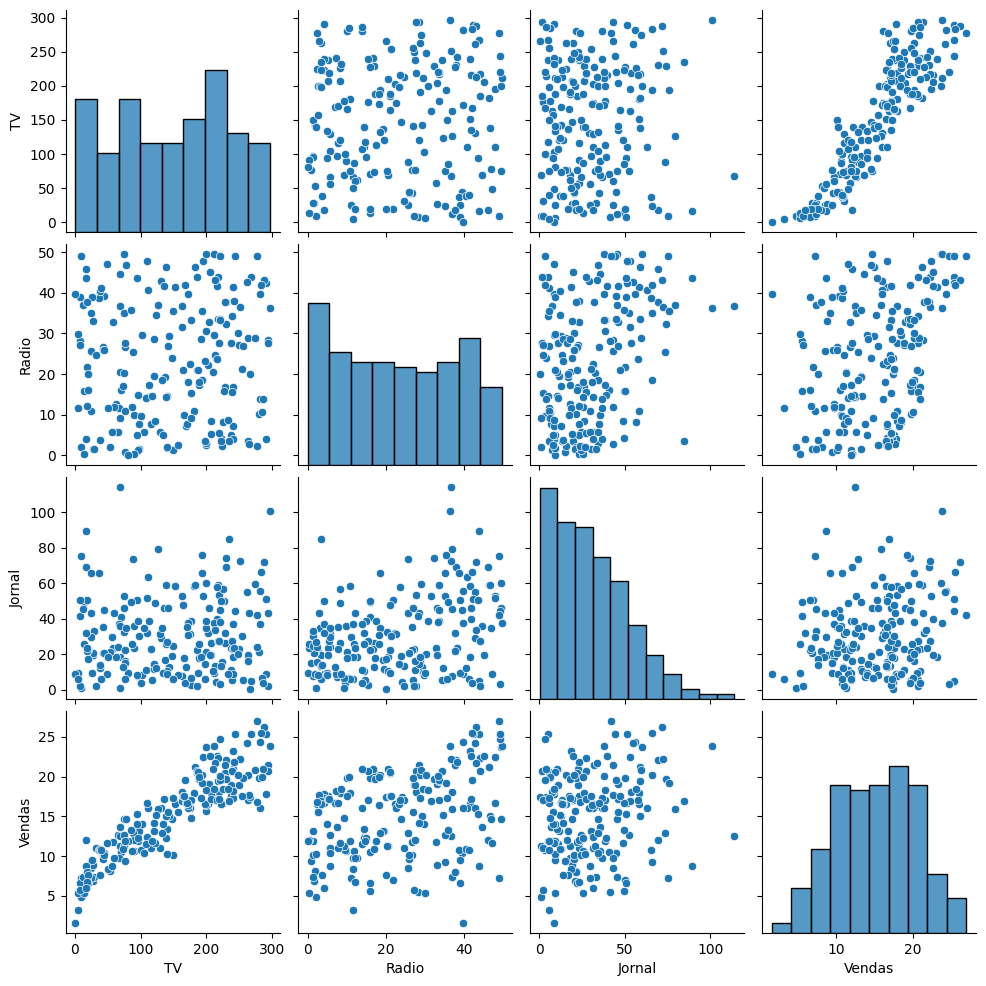

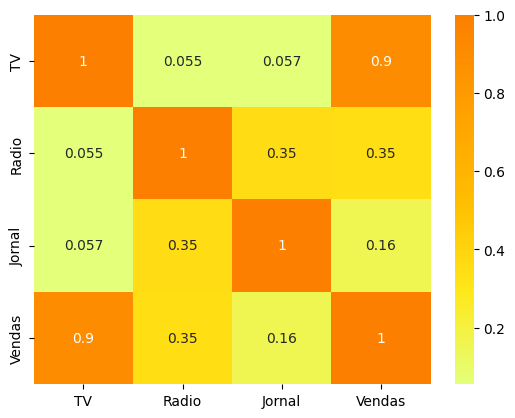

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Imprimir os gráficos de dispersão
sns.pairplot(df)
plt.show()

# Imprimir o mapa de calor da base
sns.heatmap(df.corr(), cmap = 'Wistia', annot=True)
plt.show()
 

#### Com isso, podemos partir para a preparação dos dados para treinarmos o Modelo de Machine Learning

- Separando em dados de treino e dados de teste

In [3]:
# Importando a biblioteca de IA que vai fazer a separação dos dados de treino e de teste
from sklearn.model_selection import train_test_split

# Definindo os valores que vão compor o exio X, axis=1 indica que todo o dataframe com exceção da coluna ‘Vendas’;
# irão compor os valore de X (inputs)
x = df.drop('Vendas', axis=1)

# Definindo que os valores que irão compor Y, são da coluna Vendas 
y = df['Vendas']

# Definindo os dados de treino e teste de X e Y e sua proporção
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
 



#### Temos um problema de regressão - Vamos escolher os modelos que vamos usar:

- Regressão Linear
- RandomForest (Árvore de Decisão)

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np

# Treino da AI com o modelo Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

# Treino da AI com o modelo Random Forest Regressor
rf_rg = RandomForestRegressor()
rf_rg.fit(x_train, y_train)


RandomForestRegressor()

#### Teste da AI e Avaliação do Melhor Modelo

- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [5]:
# Testando a AI
test_pred_lin = lin_reg.predict(x_test)
test_pred_rf = rf_rg.predict(x_test)

# Indicador de resultados R2 do teste
r2_lin = metrics.r2_score(y_test, test_pred_lin)
rsme_lin = np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin))
print(f"R2 da Regressão Linear: {r2_lin}")
print(f"RSME da Regressão Linear: {rsme_lin}")

r2_rf = metrics.r2_score(y_test, test_pred_rf)
rsme_rf = np.sqrt(metrics.mean_squared_error(y_test, test_pred_rf))
print(f"R2 da Random Forest: {r2_rf}")
print(f"RSME do Random Forest: {rsme_rf}")


R2 da Regressão Linear: 0.9071151423684273
RSME da Regressão Linear: 1.5396947656031237
R2 da Random Forest: 0.9652071056071946
RSME do Random Forest: 0.9423396238441157


#### Visualização Gráfica das Previsões

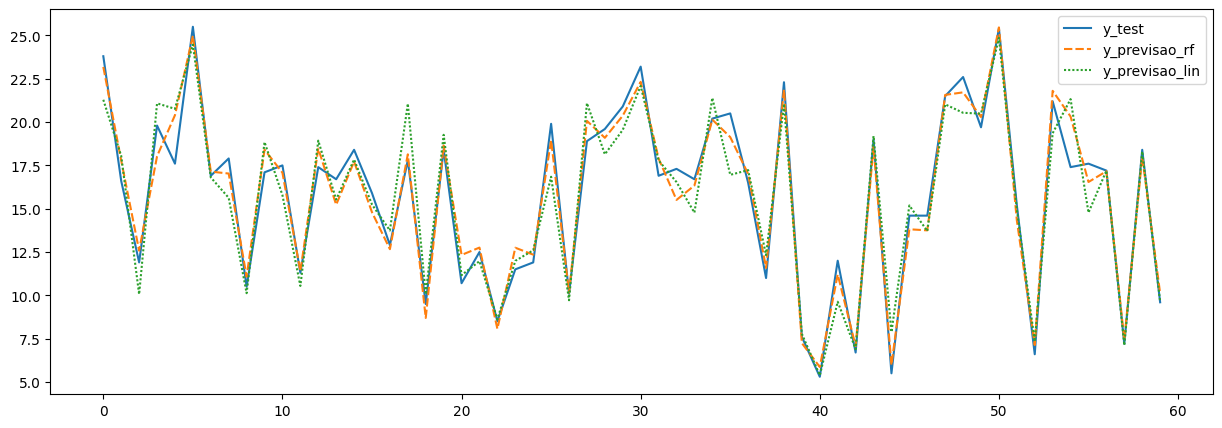

,y_test,y_previsao_rf,y_previsao_lin
0,23.8,23.182,21.288161
1,16.6,17.772,18.042132
2,11.9,12.578,10.059590
3,19.8,18.028,21.082241
4,17.6,20.400,20.764760
5,25.5,24.985,24.471874
6,16.9,17.141,16.806436
7,17.9,17.030,15.628857
8,10.5,11.074,10.124799
9,17.1,18.405,18.846019


In [7]:
# Interpretação dos resultados
# Análise gráfica

df_resultado = pd.DataFrame()

# df_resultado.index = x_test
df_resultado['y_test'] = y_test
df_resultado['y_previsao_rf'] = test_pred_rf
df_resultado['y_previsao_lin'] = test_pred_lin
df_resultado = df_resultado.reset_index(drop=True)
fig = plt.figure(figsize=(15, 5))
sns.lineplot(data=df_resultado)
plt.show()
display(df_resultado)


#### Análise Gráfica das Previsões

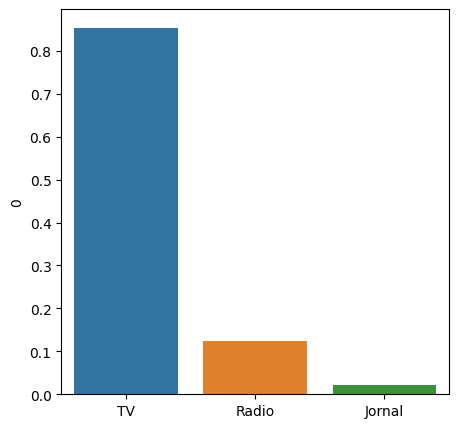

In [9]:
# Interpretação dos resultados
# Análise gráfica
importancia_features = pd.DataFrame(rf_rg.feature_importances_, x_train.columns)
plt.figure(figsize=(5, 5))
sns.barplot(x=importancia_features.index, y=importancia_features[0])
plt.show()

### Resultados

Se olharmos o print do nosso código, veremos que o valor de R² do Random Forest é MAIOR que o valor da regressão linear( Esse valor varia entre 0 e 1).<br>
Além disso, ao vermos que temos 0,96 como resultado, podemos inferir que temos um modelo confiável (Varia de indústria, mas para esse caso é um modelo aceitável).

Com o último gráfico, podemos perceber que em termos de importância para o modelo via Random Forest:<br>
    • O investimento em TV é 85% relevante;<br>
    • O Rádio têm um pouco mais de 10%;<br>
    • O Jornal não chega a mais de 5% de relevância;